In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         79 non-null     float64
 1   volatile acidity      79 non-null     float64
 2   citric acid           79 non-null     float64
 3   residual sugar        79 non-null     float64
 4   chlorides             79 non-null     float64
 5   free sulfur dioxide   79 non-null     int64  
 6   total sulfur dioxide  79 non-null     int64  
 7   density               79 non-null     float64
 8   pH                    79 non-null     float64
 9   sulphates             79 non-null     float64
 10  alcohol               79 non-null     float64
 11  quality               79 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 7.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,79.0,7.635443,1.042930,4.6000,7.1500,7.7000,8.1000,11.2000
volatile acidity,79.0,0.559557,0.164965,0.2200,0.4150,0.5900,0.6700,1.1300
citric acid,79.0,0.208354,0.181669,0.0000,0.0500,0.1600,0.3100,0.6400
residual sugar,79.0,2.588608,1.497326,1.2000,1.8000,2.1000,2.5000,10.7000
chlorides,79.0,0.096975,0.054618,0.0500,0.0740,0.0840,0.0935,0.3680
free sulfur dioxide,79.0,15.455696,10.435145,3.0000,9.0000,13.0000,17.0000,52.0000
total sulfur dioxide,79.0,52.860759,33.994620,10.0000,25.0000,45.0000,72.0000,148.0000
density,79.0,0.996833,0.001083,0.9934,0.9962,0.9968,0.9976,0.9993
pH,79.0,3.340000,0.135751,3.0400,3.2600,3.3400,3.4150,3.9000
sulphates,79.0,0.656962,0.196066,0.3900,0.5400,0.5800,0.7300,1.5600


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

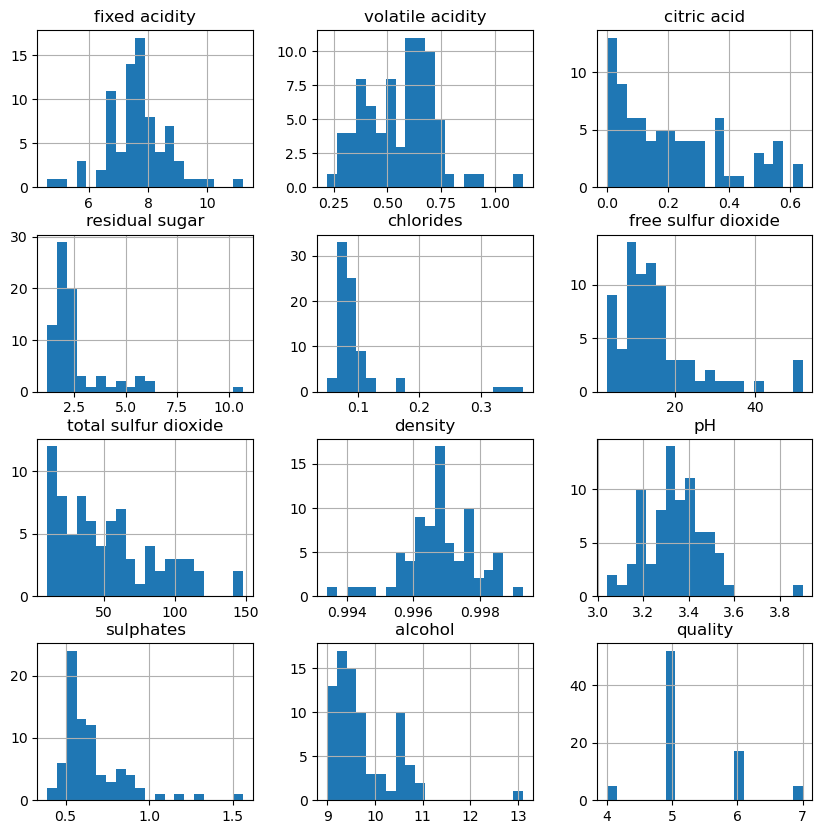

In [7]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

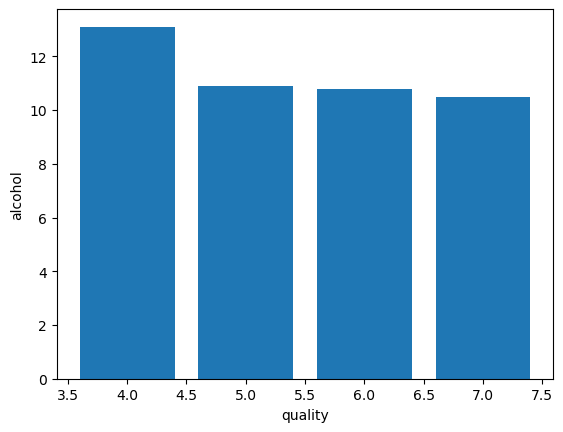

In [8]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

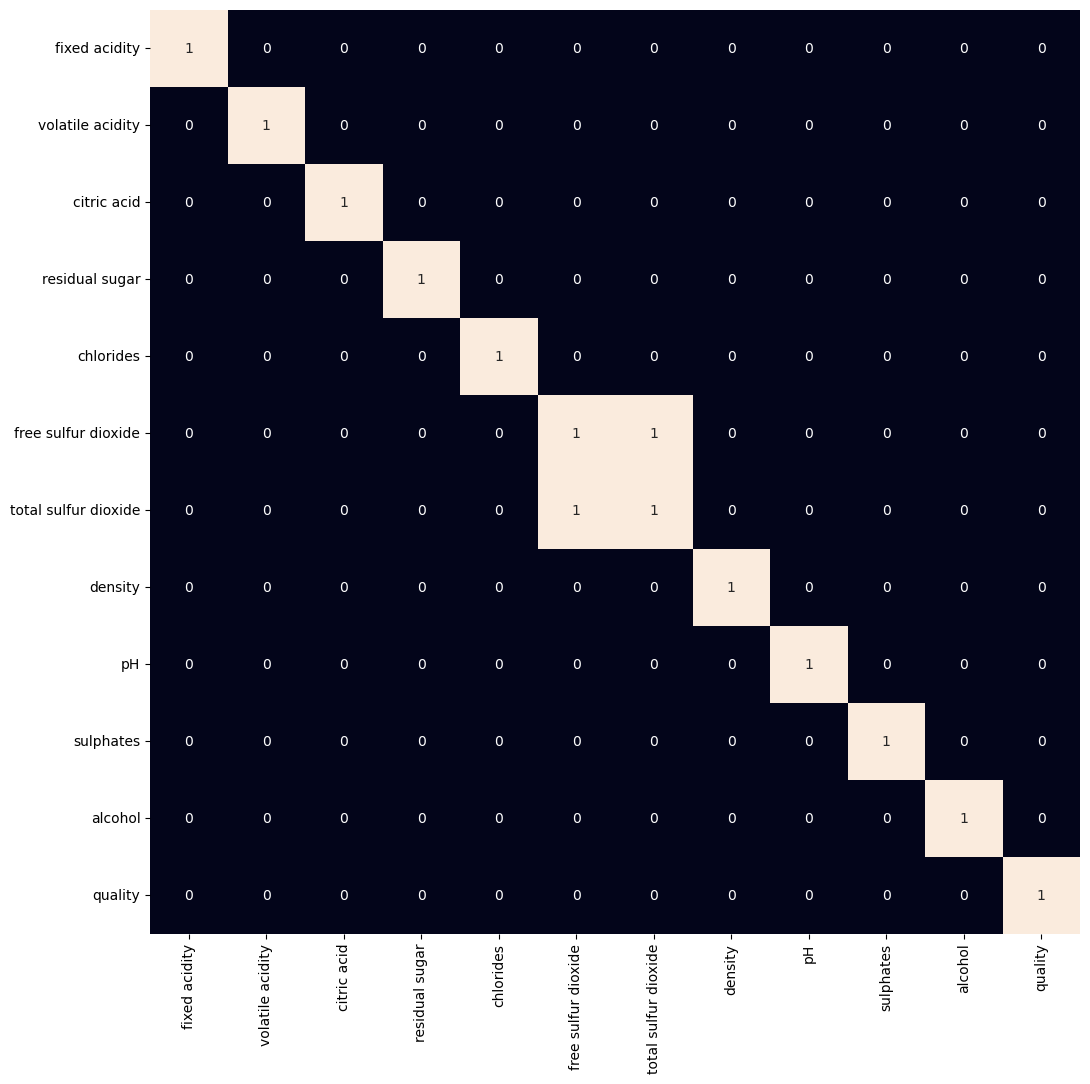

In [9]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [10]:
df = df.drop('total sulfur dioxide', axis=1)

In [11]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [12]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [13]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((63, 10), (16, 10))

In [14]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [15]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()

LogisticRegression() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.5833333333333333

SVC() : 
Training Accuracy :  0.5277777777777778
Validation Accuracy :  0.5



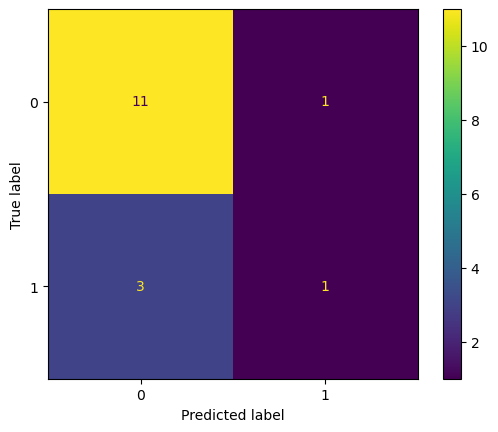

In [16]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

In [17]:
print(metrics.classification_report(ytest,
models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.25      0.33         4

    accuracy                           0.75        16
   macro avg       0.64      0.58      0.59        16
weighted avg       0.71      0.75      0.72        16

